# Loading the Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1Ekttn0UBuUPhDGi3VU-egdG38hrwLNeB
!gdown 1Vt7Stmj4JKn_Y58R1TNAKtOrFDn9D-n2
!gdown 1VZch6GVFaCLBP6NBK0ud3gP5zJcmiM83
!gdown 1w0AmBAe_0pxlT1Jnf1vu6JFdTg5pFQhI

Downloading...
From: https://drive.google.com/uc?id=1Ekttn0UBuUPhDGi3VU-egdG38hrwLNeB
To: /content/X097_FE_time.csv
100% 3.17M/3.17M [00:00<00:00, 27.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vt7Stmj4JKn_Y58R1TNAKtOrFDn9D-n2
To: /content/X097_DE_time.csv
100% 3.22M/3.22M [00:00<00:00, 26.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VZch6GVFaCLBP6NBK0ud3gP5zJcmiM83
To: /content/X105_FE_time.csv
100% 1.58M/1.58M [00:00<00:00, 24.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1w0AmBAe_0pxlT1Jnf1vu6JFdTg5pFQhI
To: /content/X105_DE_time.csv
100% 1.62M/1.62M [00:00<00:00, 16.7MB/s]


97 = Normal
105 = Fault

In [ ]:
#97 = normal , 105 = fault
X097_DE_time = pd.read_csv('X097_DE_time.csv',header=None).values
X105_DE_time = pd.read_csv('X105_DE_time.csv',header=None).values
X097_FE_time = pd.read_csv('X097_FE_time.csv',header=None).values
X105_FE_time = pd.read_csv('X105_FE_time.csv',header=None).values

# Creating the Matrix

In [ ]:
# Define constants
M = 100  # Number of samples per class
N = 200  # Length of each sample
total_samples = M * 2  # Total number of samples (2 classes)

# Randomly select starting points for Normal DE data
healthy_starting_points = np.random.randint(0, len(X097_DE_time) - N, size=M)

# Randomly select starting points for fault DE data
defective_starting_points = np.random.randint(0, len(X105_DE_time) - N, size=M)

# Initialize empty arrays to store selected samples and labels
selected_samples = np.zeros((total_samples, N))
labels = np.zeros(total_samples)

# Fill in the selected samples and labels for healthy DE
for i, start_point in enumerate(healthy_starting_points):
    selected_samples[i] = np.squeeze( X097_DE_time[start_point:start_point + N])
    labels[i] = 0  # Label 0 for normal DE

# Fill in the selected samples and labels for fault DE
for i, start_point in enumerate(defective_starting_points):
    selected_samples[i + M] = np.squeeze(X105_DE_time[start_point:start_point + N])
    labels[i + M] = 1  # Label 1 for Falut DE


print(selected_samples.shape)
print(labels.shape)

(200, 200)
(200,)


# Feature Extraction,Shuffling and Normalization

In [ ]:

# Feature extraction methods
def shape_factor(data):
    return np.sqrt(np.mean(np.square(data))) / np.mean(np.abs(data))

def impact_factor(data):
    return np.max(data)/ np.mean(np.abs(data))

def Crest_Factor(data):
    return  np.max(data) / np.sqrt(np.mean(np.square(data)))

def absolute_mean(data):
    return np.mean(np.abs(data))

def root_mean_square(data):
    return np.sqrt(np.mean(np.square(data)))

def impulse_factor(data):
    return np.max(np.abs(data)) / np.mean(np.abs(data))

def standard_deviation(data):
    return np.std(data)

def impact_factor(data):
    return np.max(np.abs(data)) / np.mean(np.abs(data))


# Initialize empty array to store extracted features
num_features = 9
num_samples, sample_length = selected_samples.shape
extracted_features = np.zeros((num_samples, num_features))

# Extract features for each sample
for i in range(num_samples):
    sample = selected_samples[i]
    extracted_features[i, 0] = shape_factor(sample)
    extracted_features[i, 1] = impact_factor(sample)
    extracted_features[i, 2] = Crest_Factor(sample)
    extracted_features[i, 3] = np.mean(sample)
    extracted_features[i, 4] = absolute_mean(sample)
    extracted_features[i, 5] = root_mean_square(sample)
    extracted_features[i, 6] = impulse_factor(sample)
    extracted_features[i, 7] = standard_deviation(sample)
    extracted_features[i, 8] = impact_factor(sample)

# Now we have a new dataset with extracted features
extracted_features


array([[1.2779319 , 3.99390322, 3.12528642, ..., 3.99390322, 0.0511341 ,
        3.99390322],
       [1.21470676, 2.68167271, 2.20767086, ..., 2.68167271, 0.08234357,
        2.68167271],
       [1.22174139, 3.02407887, 2.0743224 , ..., 3.02407887, 0.08049215,
        3.02407887],
       ...,
       [1.42502481, 6.48691633, 4.55214273, ..., 6.48691633, 0.29373132,
        6.48691633],
       [1.35445977, 4.59945937, 3.39578885, ..., 4.59945937, 0.29290667,
        4.59945937],
       [1.35292268, 4.30261797, 2.65395995, ..., 4.30261797, 0.28748548,
        4.30261797]])

In [ ]:
# Combine features and labels
data_with_labels = np.column_stack((extracted_features, labels))
print(data_with_labels.shape)
# Shuffle the data
np.random.shuffle(data_with_labels)
data_with_labels

(200, 10)


array([[1.35169662, 5.89001373, 4.35749682, ..., 0.27870677, 5.89001373,
        1.        ],
       [1.46229815, 6.78567868, 4.64042076, ..., 0.30938286, 6.78567868,
        1.        ],
       [1.2661485 , 2.98021595, 2.35376495, ..., 0.05432436, 2.98021595,
        0.        ],
       ...,
       [1.41566487, 5.78591659, 4.0870666 , ..., 0.25509884, 5.78591659,
        1.        ],
       [1.19317073, 2.44071645, 2.04557184, ..., 0.07809902, 2.44071645,
        0.        ],
       [1.22405471, 3.37811899, 2.75977778, ..., 0.06971364, 3.37811899,
        0.        ]])

In [ ]:
# Define the division ratio for training and evaluation sets
division_ratio = 0.8  # 80% for training, 20% for evaluation

# Calculate the split index
split_index = int(division_ratio * num_samples)

# Split the data into training and evaluation sets
training_data = data_with_labels[:split_index]
evaluation_data = data_with_labels[split_index:]

# Separate features and labels for training
X_train = training_data[:, :-1]  # Features for training
y_train = training_data[:, -1]   # Labels for training

# Separate features and labels for evaluation
X_eval = evaluation_data[:, :-1]  # Features for evaluation
y_eval = evaluation_data[:, -1]   # Labels for evaluation

In [ ]:
# Calculate mean and standard deviation of each feature
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

# Perform standardization
X_train_standardized = (X_train - mean) / std

# Classification from Scratch

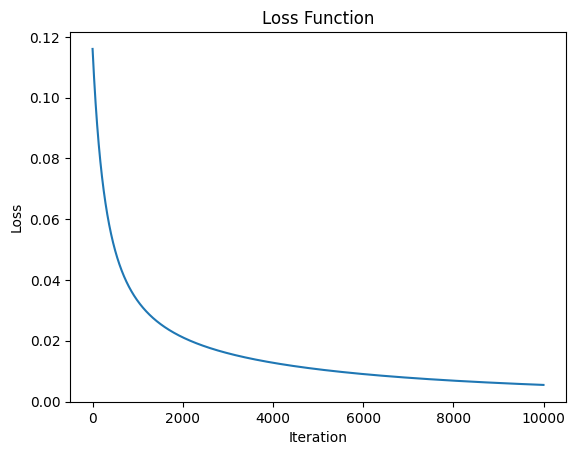

In [ ]:
import matplotlib.pyplot as plt

# data
X = X_train_standardized
y = y_train

# Initialize parameters
np.random.seed(0)
W = np.random.randn(9)
b = 0

# Define logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward propagation
def forward_propagation(X, W, b):
    z = np.dot(X, W) + b
    return sigmoid(z)

# Loss function (binary cross-entropy)
def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-15
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Gradient descent
learning_rate = 0.01
num_iterations = 10000
losses = []

for i in range(num_iterations):
    # Forward propagation
    y_pred = forward_propagation(X, W, b)

    # Compute loss
    loss = binary_cross_entropy(y_pred, y)
    losses.append(loss)

    # Backward propagation
    dz = y_pred - y
    dW = np.dot(X.T, dz) / len(X)
    db = np.mean(dz)

    # Update parameters
    W -= learning_rate * dW
    b -= learning_rate * db

# Plot loss function
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

In [ ]:
# Evaluate model on test data


X_test = X_eval
y_test = y_eval

# Forward propagation to get predictions on test data
y_pred_test = forward_propagation(X_test, W, b)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = np.where(y_pred_test >= 0.5, 1, 0)

# Calculate accuracy
accuracy = np.mean(y_pred_binary == y_test)

# Calculate precision, recall, and F1-score
TP = np.sum((y_pred_binary == 1) & (y_test == 1))
FP = np.sum((y_pred_binary == 1) & (y_test == 0))
FN = np.sum((y_pred_binary == 0) & (y_test == 1))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * precision * recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Accuracy: 0.475
Precision: 0.475
Recall: 1.0
F1-score: 0.6440677966101694


# Sklearn Model

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(160, 9)
(40, 9)
(40,)
(160,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# data
#X_train = X_train_standardized
#X_test = X_eval
#y_test = y_eval
#y_train


# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict binary predictions on test data
y_pred_binary = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Performance Metrics:
Accuracy: 0.975
Precision: 1.0
Recall: 0.9473684210526315
F1-score: 0.972972972972973


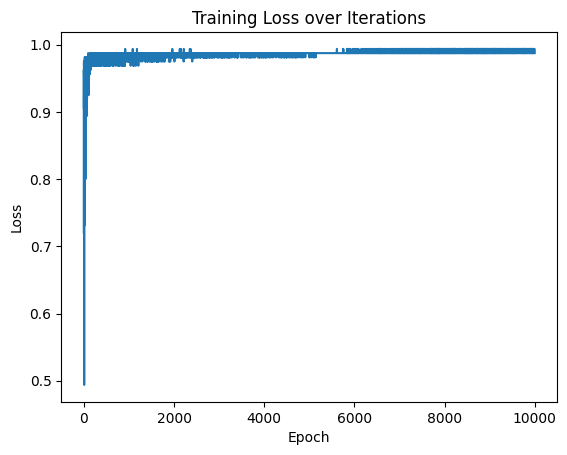

In [ ]:
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize SGDClassifier with 'log' loss
clf = SGDClassifier(loss='log_loss', max_iter=10000, tol=1e-3)

# Train the classifier
loss_values = []
for i in range(10000):  # Run for 10 epochs
    clf.partial_fit(X_train, y_train, classes=[0, 1])  # Specify the classes explicitly
    loss_values.append(clf.score(X_train, y_train))  # Compute the loss using the score method

# Plot the loss function values over iterations
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()
